## Automotive Diagnostics

##### Importation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


### Data Exploration

In [7]:
file_path = "OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv"
data1 = pd.read_csv(file_path)
# data1 = pd.read_csv("OBD-II-Dataset/annotated.csv")
data1.head()

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,07:16:30.444,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07:16:30.535,31,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07:16:30.625,31,96.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07:16:30.716,31,96.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07:16:30.814,31,96.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN


In [15]:
data2 = pd.read_csv("OBD-II-Dataset/2017-07-05_Seat_Leon_S_KA_Normal.csv")
# data1 = pd.read_csv("OBD-II-Dataset/annotated.csv")
data2.head()

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,19:17:19.418,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19:17:19.508,33,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19:17:19.598,33,97.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19:17:19.688,33,97.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,19:17:19.779,33,97.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Show number of columns (features)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46349 entries, 0 to 46348
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       46349 non-null  object 
 1   Engine Coolant Temperature [Â°C]           46349 non-null  int64  
 2   Intake Manifold Absolute Pressure [kPa]    46348 non-null  float64
 3   Engine RPM [RPM]                           46347 non-null  float64
 4   Vehicle Speed Sensor [km/h]                46346 non-null  float64
 5   Intake Air Temperature [Â°C]               46345 non-null  float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  46344 non-null  float64
 7   Absolute Throttle Position [%]             46343 non-null  float64
 8   Ambient Air Temperature [Â°C]              46342 non-null  float64
 9   Accelerator Pedal Position D [%]           46341 non-null  float64
 10  Accelerator Pedal Posi

In [14]:
data1.isnull().sum().sum()

45

In [21]:
# Set time index
data1["Time"] = pd.to_datetime(data1["Time"])
data1 = data1.set_index("Time")

KeyError: 'Time'

#### Visualise each column in the dataset

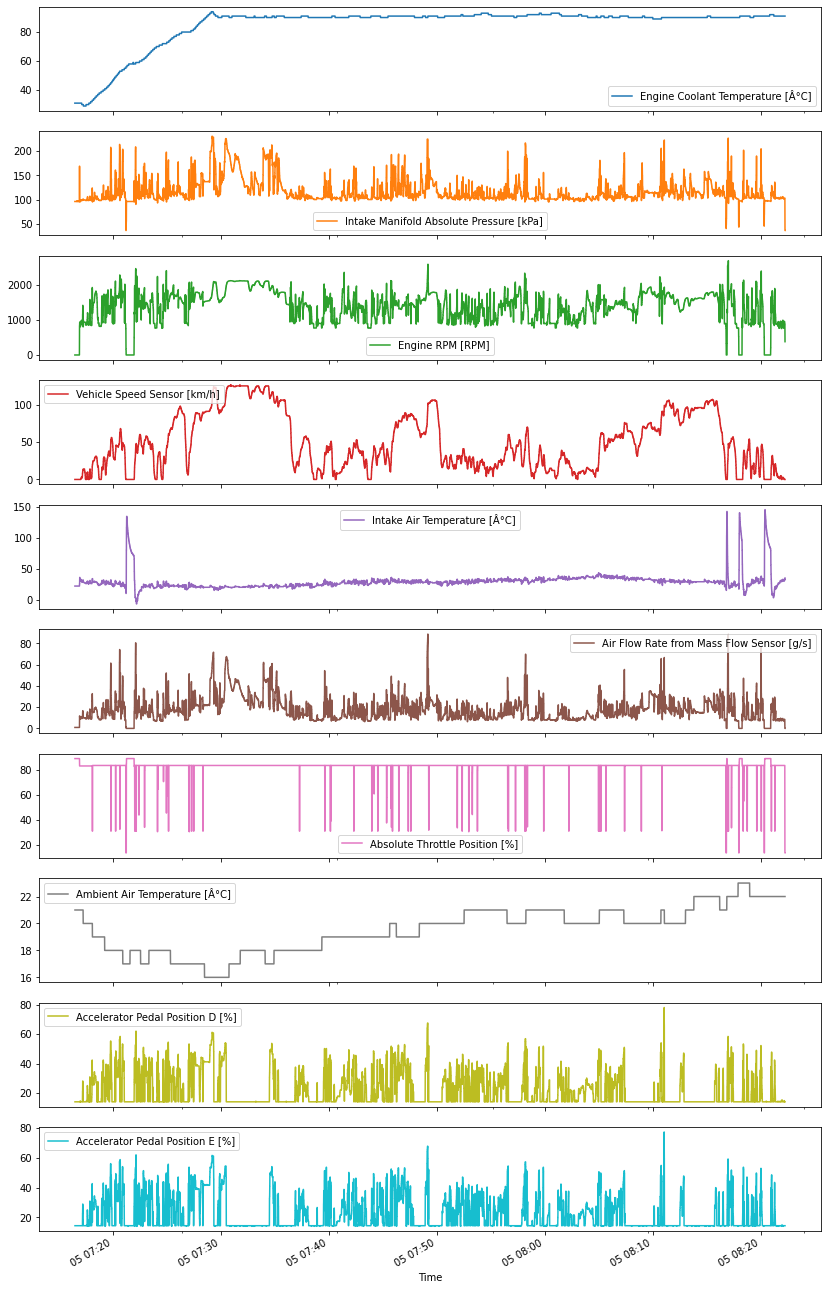

In [18]:
data1.plot(subplots=True, figsize=(14,25))
plt.show()

In [24]:
print(data1.count())

Engine Coolant Temperature [Â°C]             46349
Intake Manifold Absolute Pressure [kPa]      46348
Engine RPM [RPM]                             46347
Vehicle Speed Sensor [km/h]                  46346
Intake Air Temperature [Â°C]                 46345
Air Flow Rate from Mass Flow Sensor [g/s]    46344
Absolute Throttle Position [%]               46343
Ambient Air Temperature [Â°C]                46342
Accelerator Pedal Position D [%]             46341
Accelerator Pedal Position E [%]             46340
dtype: int64


In [25]:
data1.describe()

,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
count,46349.000000,46348.000000,46347.000000,46346.000000,46345.000000,46344.000000,46343.000000,46342.000000,46341.000000,46340.000000
mean,84.906017,117.672564,1378.157874,49.570621,29.204984,18.007800,82.740761,19.512839,22.197754,22.484117
std,14.497587,24.173883,442.663154,37.191098,13.140728,11.245441,6.953128,1.666180,11.137948,11.188321
min,29.000000,36.000000,0.000000,0.000000,-7.000000,0.000000,13.700000,16.000000,14.100000,14.100000
25%,90.000000,103.000000,1054.000000,17.000000,23.000000,9.910000,83.500000,18.000000,14.100000,14.500000
50%,90.000000,109.000000,1443.000000,42.000000,28.000000,15.520000,83.500000,20.000000,14.100000,14.500000
75%,91.000000,123.000000,1689.000000,83.000000,32.000000,22.630000,83.500000,21.000000,29.000000,29.000000
max,94.000000,231.000000,2689.000000,126.000000,146.000000,88.800000,89.000000,23.000000,78.000000,77.300000


<AxesSubplot:>

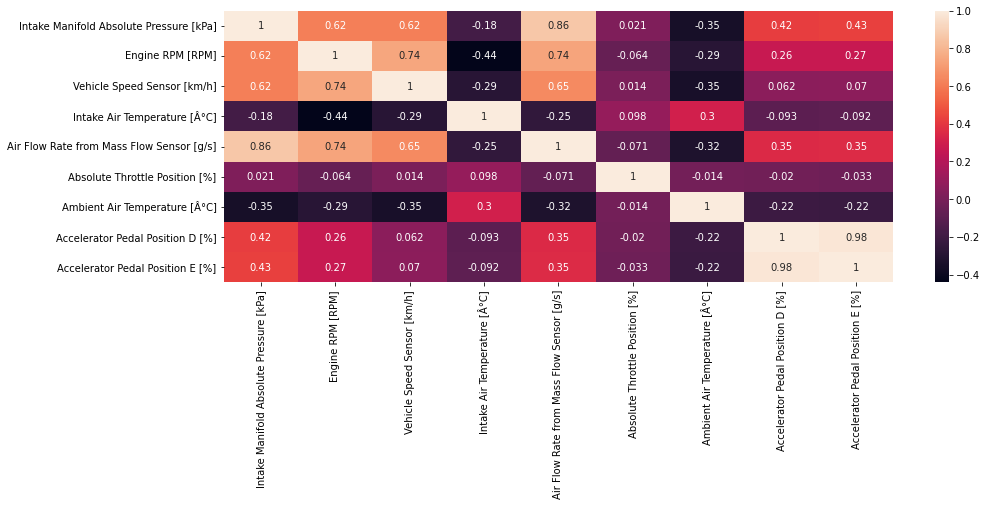

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(data1.iloc[:,1:].corr(), annot=True)